In [131]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt


In [132]:
df = pd.read_csv(r"C:\Users\dhrit\Downloads\Iris.csv")


In [133]:
if "Id" in df.columns:
    df = df.drop("Id", axis=1)

In [134]:
X = df.drop("Species", axis=1)
y = df["Species"]

In [135]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [136]:

aram_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5],
    'min_samples_split': [2, 3, 4]
}

In [137]:
grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy'
)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score (CV Accuracy):", grid.best_score_)
print("Test Accuracy:", grid.score(X_test, y_test))

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 5}
Best Score (CV Accuracy): 0.9523809523809523
Test Accuracy: 0.9333333333333333


In [138]:
best_tree = grid.best_estimator_


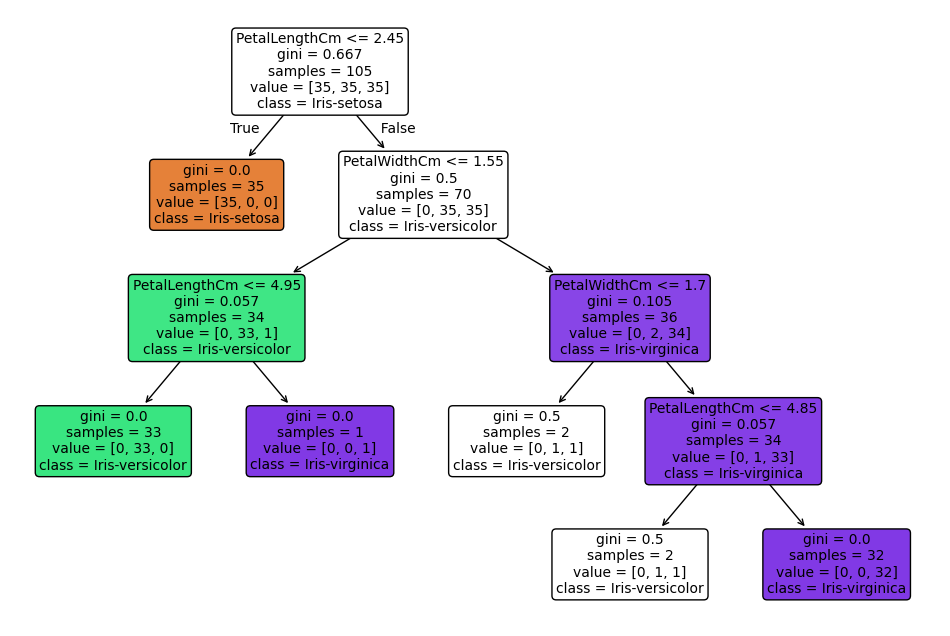

In [139]:
plt.figure(figsize=(12, 8))
plot_tree(best_tree,
          feature_names=X.columns,
          class_names=y.unique(),
          filled=True,
          rounded=True,
          fontsize=10)
plt.show()
